<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/%E1%84%89%E1%85%A1%E1%86%BC%E1%84%80%E1%85%AF%E1%86%AB%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공공데이터를 이용한 카페 상권분석

## Data Download Link 
### https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15083033#layer_data_infomation

In [ ]:
# 먼저 필요한 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp = pd.read_csv("../Downloads/sohodata_202103/소상공인시장진흥공단_상가(상권)정보_인천_202103.csv"
                   ,sep=',',encoding = "utf-8")
temp.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23498449,츄로하임,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2826010400109750004000001,청라반도유보라,인천광역시 서구 솔빛로 55,404170.0,22765.0,NaN,NaN,102,126.626740,37.525163
1,22882934,간석미용실,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,2820010200101900026021270,NaN,인천광역시 남동구 석촌로14번길 5,405230.0,21545.0,NaN,NaN,NaN,126.709349,37.461969


## 1. 데이터 불러오기

In [ ]:
# 39개의 변수를 확인해 볼 필요가 있다.
temp.columns
# 변수가 너무 많다!! 
# 카페를 분석하는 데 필요한 변수만 추출할 것이다!!
#temp.상권업종소분류명.unique()

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### (1) 일단 여러 csv 파일 한번에 불러오기

In [ ]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
from glob import glob

# csv 목록 불러오기
file_names = glob("../Downloads/sohodata_202103/*.csv")
total = pd.DataFrame()

# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name,sep=',',encoding='utf-8')
    total = pd.concat([total,temp])
# reset index로 인덱스를 새로 지정할 수 있다.
total.reset_index(inplace=True, drop=True) #기존 index 제거하고 싶을땐 drop=True
total

/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_81149/1925688356.py:10: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',',encoding='utf-8')
/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_81149/1925688356.py:10: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',',encoding='utf-8')
/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_81149/1925688356.py:10: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',',encoding='utf-8')
/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_81149/1925688356.py:10: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file_name,sep=',',encoding='utf-8')
/var/folders/rf/xczzxbyd4p3ffh0_wcsz

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174231,에프케이알레그리아호텔제주,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,5013010100103190002000005,비스타케이호텔(천지연),제주특별자치도 서귀포시 중앙로47번길 25,697844.0,63592.0,NaN,NaN,NaN,126.559015,33.248179
1,21706657,동경부동산,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,5013010100102900005031397,동문레코드,제주특별자치도 서귀포시 중앙로 70-1,697843.0,63591.0,NaN,NaN,NaN,126.561556,33.250877
2,15517264,금실홈패션,NaN,D,소매,D07,가정/주방/인테리어,D07A09,홈패션,G47411,...,5011010800101350009019203,서문공설시장,제주특별자치도 제주시 서문로4길 13-2,690819.0,63154.0,NaN,NaN,125,126.517956,33.511339
3,17175305,숙성1퍼센트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,5011012200137850003000001,NaN,제주특별자치도 제주시 노형10길 25,690805.0,63083.0,NaN,NaN,NaN,126.479894,33.483335
4,17173846,아빠가닭튀기는집,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,5011025024011990003006865,NaN,제주특별자치도 제주시 한림읍 한림중앙로 26,695932.0,63032.0,NaN,NaN,NaN,126.264860,33.412363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233992,17432320,태화강참숯가마,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A03,목욕업-찜질방,S96121,...,3171025335103700007000001,NaN,울산광역시 울주군 언양읍 대암둔기로 82,689801.0,44936.0,NaN,NaN,NaN,129.184084,35.548736
2233993,17451425,노는언니,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,3117010400106260008004812,NaN,울산광역시 동구 진성8길 135,682816.0,44042.0,NaN,NaN,NaN,129.429791,35.511598
2233994,17451087,채사랑,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,3171033026102270001016538,대경휴게소,울산광역시 울주군 청량읍 남부순환도로 240,689863.0,44960.0,NaN,NaN,NaN,129.268948,35.528368
2233995,17432160,명칭없음,NaN,F,생활서비스,F01,이/미용/건강,F01A03,비만/피부관리,NaN,...,3117010200108510006002651,NaN,울산광역시 동구 양지5길 19,682823.0,44073.0,NaN,1.0,102,129.420264,35.496361


In [ ]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
data=total[['상호명','지점명','상권업종대분류명','상권업종중분류명','시도명','시군구명','행정동명']]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,에프케이알레그리아호텔제주,NaN,숙박,호텔/콘도,제주특별자치도,서귀포시,천지동
1,동경부동산,NaN,부동산,부동산중개,제주특별자치도,서귀포시,중앙동
2,금실홈패션,NaN,소매,가정/주방/인테리어,제주특별자치도,제주시,용담1동
3,숙성1퍼센트,NaN,음식,한식,제주특별자치도,제주시,노형동
4,아빠가닭튀기는집,NaN,음식,유흥주점,제주특별자치도,제주시,한림읍
...,...,...,...,...,...,...,...
2233992,태화강참숯가마,NaN,생활서비스,대중목욕탕/휴게,울산광역시,울주군,언양읍
2233993,노는언니,NaN,음식,유흥주점,울산광역시,동구,전하2동
2233994,채사랑,NaN,음식,한식,울산광역시,울주군,청량읍
2233995,명칭없음,NaN,생활서비스,이/미용/건강,울산광역시,동구,화정동


## 2. 데이터 구경하기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233997 entries, 0 to 2233996
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 119.3+ MB


In [ ]:
data.describe()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
count,2233994,327569,2233997,2233997,2233997,2233997,2233997
unique,1273411,111919,8,95,17,234,3221
top,CU,본점,음식,한식,경기도,서구,중앙동
freq,11208,2371,845782,324746,508845,66428,40277


In [ ]:
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타교육기관',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산임대',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연구소',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '전시/관람',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '특수교육기관',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학교',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육'

In [ ]:
# 카페만 뽑아냅니다.
df_coffee = data[data["상권업종중분류명"]=='커피점/카페']
print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head()

전국 커피 전문점 점포 수 :  106710


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
26,나무,NaN,음식,커피점/카페,제주특별자치도,제주시,조천읍
188,커피마마,제주연동점,음식,커피점/카페,제주특별자치도,제주시,연동
192,팡,NaN,음식,커피점/카페,제주특별자치도,제주시,삼양동
235,카페다빈치제주점,제주점,음식,커피점/카페,제주특별자치도,제주시,노형동
237,리치망고,신제주점,음식,커피점/카페,제주특별자치도,제주시,연동


In [ ]:
set(data['시도명'])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [ ]:
# 시도별로 구분하는 데이터 만들기
df_coffee_seoul = df_coffee[df_coffee['시도명']=='서울특별시']
df_coffee_seoul.index = range(len(df_coffee_seoul)) # index 재설정
# df_coffee_seoul.reset_index(inplace=True, drop=True)
df_coffee_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,메머드커피,NaN,음식,커피점/카페,서울특별시,마포구,서교동
3,버블베어,NaN,음식,커피점/카페,서울특별시,강서구,방화3동
4,우성커피숍,NaN,음식,커피점/카페,서울특별시,양천구,신월4동


In [ ]:
# for문으로 전국 시도명별 데이터 만드는 법
a=list(set(data['시도명']))
import sys
mod = sys.modules[__name__]
for i in range(len(a)):
    setattr(mod, 'df_coffee_{}' .format(a[i]), df_coffee[df_coffee['시도명']==a[i]])
# 이건 for문을 돌릴 방법을 못 찾겠네요...
df_coffee_강원도.index = range(len(df_coffee_강원도))
df_coffee_경기도.index = range(len(df_coffee_경기도))
df_coffee_경상남도.index = range(len(df_coffee_경상남도))
df_coffee_경상북도.index = range(len(df_coffee_경상북도))
df_coffee_광주광역시.index = range(len(df_coffee_광주광역시))
df_coffee_대구광역시.index = range(len(df_coffee_대구광역시))
df_coffee_대전광역시.index = range(len(df_coffee_대전광역시))
df_coffee_부산광역시.index = range(len(df_coffee_부산광역시))
df_coffee_서울특별시.index = range(len(df_coffee_서울특별시))
df_coffee_세종특별자치시.index = range(len(df_coffee_세종특별자치시))
df_coffee_울산광역시.index = range(len(df_coffee_울산광역시))
df_coffee_인천광역시.index = range(len(df_coffee_인천광역시))
df_coffee_전라남도.index = range(len(df_coffee_전라남도))
df_coffee_전라북도.index = range(len(df_coffee_전라북도))
df_coffee_제주특별자치도.index = range(len(df_coffee_제주특별자치도))
df_coffee_충청남도.index = range(len(df_coffee_충청남도))
df_coffee_충청북도.index = range(len(df_coffee_충청북도))

df_coffee_대구광역시

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,브라운,NaN,음식,커피점/카페,대구광역시,수성구,고산2동
1,커피명가,2호점,음식,커피점/카페,대구광역시,중구,삼덕동
2,대림다방,NaN,음식,커피점/카페,대구광역시,수성구,수성2.3가동
3,카페머그,NaN,음식,커피점/카페,대구광역시,중구,성내2동
4,샌디버블,NaN,음식,커피점/카페,대구광역시,남구,대명2동
...,...,...,...,...,...,...,...
5108,카페,이루다스터디,음식,커피점/카페,대구광역시,달서구,월성1동
5109,커피지상주의,NaN,음식,커피점/카페,대구광역시,달서구,용산1동
5110,그린바스켓,NaN,음식,커피점/카페,대구광역시,수성구,만촌3동
5111,티앤오T.N.O,NaN,음식,커피점/카페,대구광역시,북구,침산2동


#### 전국 스타벅스

In [ ]:
df_스타벅스 = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_스타벅스.index = range(len(df_스타벅스))
print('전국 스타벅스 점포 수 :', len(df_스타벅스))
df_스타벅스.head()

전국 스타벅스 점포 수 : 1563


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,제주송악산점,음식,커피점/카페,제주특별자치도,서귀포시,대정읍
1,스타벅스,성산일출봉점,음식,커피점/카페,제주특별자치도,서귀포시,성산읍
2,스타벅스,신제주이마트점,음식,커피점/카페,제주특별자치도,제주시,노형동
3,스타벅스,제주도남DT점,음식,커피점/카페,제주특별자치도,제주시,이도2동
4,스타벅스,제주협재점,음식,커피점/카페,제주특별자치도,제주시,한림읍


## 한글 글꼴 다운로드 - https://hangeul.naver.com/font

In [ ]:
# 한글깨짐 해결을 위해 코드
import matplotlib.font_manager as fm
path = 'NanumBarunGothic.ttf'
fontprob=fm.FontProperties(fname=path,size=18)

([<matplotlib.axis.XTick at 0x7fa9f4f0b2b0>,
 [Text(0, 0, '전라북도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '울산광역시'),
  Text(3, 0, '제주특별자치도'),
  Text(4, 0, '경기도'),
  Text(5, 0, '부산광역시'),
  Text(6, 0, '대구광역시'),
  Text(7, 0, '강원도'),
  Text(8, 0, '인천광역시'),
  Text(9, 0, '대전광역시'),
  Text(10, 0, '광주광역시'),
  Text(11, 0, '경상남도'),
  Text(12, 0, '세종특별자치시'),
  Text(13, 0, '전라남도'),
  Text(14, 0, '충청남도'),
  Text(15, 0, '경상북도'),
  Text(16, 0, '서울특별시')])

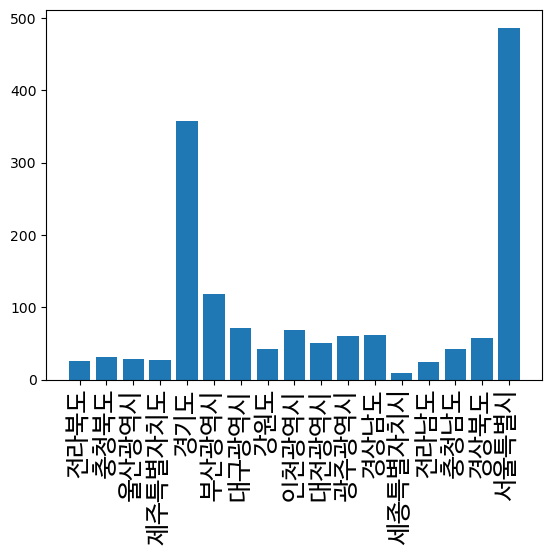

In [ ]:
# 시도별 스타벅스 분포
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = list(set(data['시도명']))
v1 = [len(df_스타벅스[df_스타벅스["시도명"]==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a, v1)
plt.xticks(index, a, fontsize=13,fontproperties=fontprob, rotation=90)

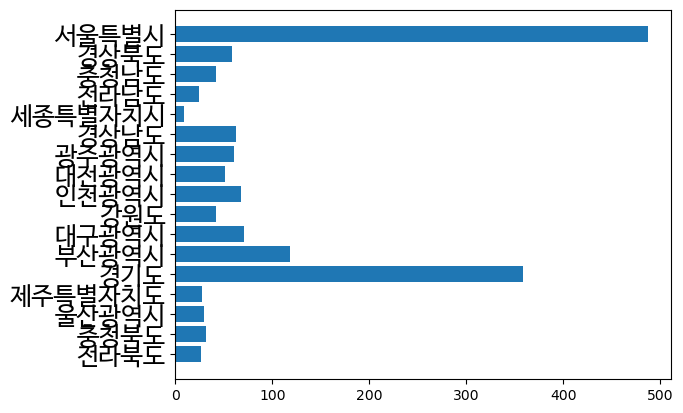

In [ ]:
# 시도별 스타벅스 분포
plt.barh(index, v1)
plt.yticks(index, a, fontsize=13,fontproperties=fontprob, rotation=0)
plt.show()
#plt.savefig('savefig_200dpi.png', dpi=200)
# 대부분의 스타벅스가 서울과 경기도 지역에 분포하는 것을 확인할 수 있다.

In [ ]:
# 지역별 스타벅스 비율 
sum_star = sum(v1)
for i in range(len(a)):
    print('스타벅스의 전국 대비 {}에서의 비율 : {:.3f}%' .format(a[i],v1[i]/sum_star*100))

스타벅스의 전국 대비 전라북도에서의 비율 : 1.663%
스타벅스의 전국 대비 충청북도에서의 비율 : 1.983%
스타벅스의 전국 대비 울산광역시에서의 비율 : 1.855%
스타벅스의 전국 대비 제주특별자치도에서의 비율 : 1.727%
스타벅스의 전국 대비 경기도에서의 비율 : 22.905%
스타벅스의 전국 대비 부산광역시에서의 비율 : 7.550%
스타벅스의 전국 대비 대구광역시에서의 비율 : 4.543%
스타벅스의 전국 대비 강원도에서의 비율 : 2.687%
스타벅스의 전국 대비 인천광역시에서의 비율 : 4.351%
스타벅스의 전국 대비 대전광역시에서의 비율 : 3.263%
스타벅스의 전국 대비 광주광역시에서의 비율 : 3.839%
스타벅스의 전국 대비 경상남도에서의 비율 : 3.967%
스타벅스의 전국 대비 세종특별자치시에서의 비율 : 0.576%
스타벅스의 전국 대비 전라남도에서의 비율 : 1.536%
스타벅스의 전국 대비 충청남도에서의 비율 : 2.687%
스타벅스의 전국 대비 경상북도에서의 비율 : 3.711%
스타벅스의 전국 대비 서울특별시에서의 비율 : 31.158%


#### 전국 투썸

In [ ]:
df_투썸 = df_coffee[df_coffee["상호명"].str.contains("투썸")]
df_투썸.index = range(len(df_투썸))
print('전국 투썸 점포 수 :', len(df_투썸))
df_투썸.head()

전국 투썸 점포 수 : 1108


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,애월점,음식,커피점/카페,제주특별자치도,제주시,애월읍
1,투썸플레이스,도두해안도로점,음식,커피점/카페,제주특별자치도,제주시,도두동
2,투썸플레이스,제주쇠소깍점,음식,커피점/카페,제주특별자치도,서귀포시,효돈동
3,투썸플레이스,제주신화빌라점,음식,커피점/카페,제주특별자치도,서귀포시,안덕면
4,투썸플레이스한라대점,한라대점,음식,커피점/카페,제주특별자치도,제주시,노형동


In [ ]:
a = list(set(data['시도명']))
a # 이것을 계속 활용한다.

['전라북도',
 '충청북도',
 '울산광역시',
 '제주특별자치도',
 '경기도',
 '부산광역시',
 '대구광역시',
 '강원도',
 '인천광역시',
 '대전광역시',
 '광주광역시',
 '경상남도',
 '세종특별자치시',
 '전라남도',
 '충청남도',
 '경상북도',
 '서울특별시']

([<matplotlib.axis.XTick at 0x7fa9f5112290>,
 [Text(0, 0, '전라북도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '울산광역시'),
  Text(3, 0, '제주특별자치도'),
  Text(4, 0, '경기도'),
  Text(5, 0, '부산광역시'),
  Text(6, 0, '대구광역시'),
  Text(7, 0, '강원도'),
  Text(8, 0, '인천광역시'),
  Text(9, 0, '대전광역시'),
  Text(10, 0, '광주광역시'),
  Text(11, 0, '경상남도'),
  Text(12, 0, '세종특별자치시'),
  Text(13, 0, '전라남도'),
  Text(14, 0, '충청남도'),
  Text(15, 0, '경상북도'),
  Text(16, 0, '서울특별시')])

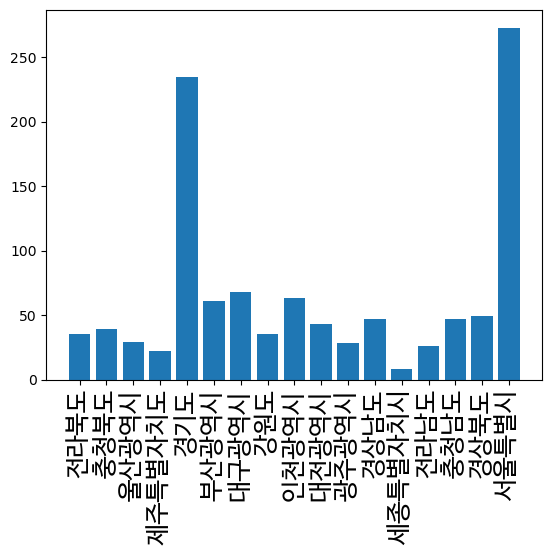

In [ ]:
v2 = [len(df_투썸[df_투썸["시도명"]==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a, v2)
plt.xticks(index, a, fontsize=13,fontproperties=fontprob, rotation=90)

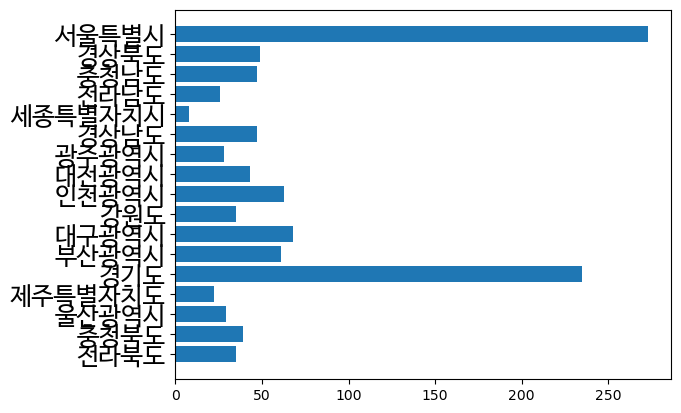

In [ ]:
# 시도별 투썸 분포
plt.barh(index, v2)
plt.yticks(index, a, fontsize=13,fontproperties=fontprob, rotation=0)
plt.show()

In [ ]:
sum_star = sum(v2)
for i in range(len(a)):
    print('투썸의 전국 대비 {}에서의 비율 : {:.3f}%' .format(a[i],v2[i]/sum_star*100))

투썸의 전국 대비 전라북도에서의 비율 : 3.159%
투썸의 전국 대비 충청북도에서의 비율 : 3.520%
투썸의 전국 대비 울산광역시에서의 비율 : 2.617%
투썸의 전국 대비 제주특별자치도에서의 비율 : 1.986%
투썸의 전국 대비 경기도에서의 비율 : 21.209%
투썸의 전국 대비 부산광역시에서의 비율 : 5.505%
투썸의 전국 대비 대구광역시에서의 비율 : 6.137%
투썸의 전국 대비 강원도에서의 비율 : 3.159%
투썸의 전국 대비 인천광역시에서의 비율 : 5.686%
투썸의 전국 대비 대전광역시에서의 비율 : 3.881%
투썸의 전국 대비 광주광역시에서의 비율 : 2.527%
투썸의 전국 대비 경상남도에서의 비율 : 4.242%
투썸의 전국 대비 세종특별자치시에서의 비율 : 0.722%
투썸의 전국 대비 전라남도에서의 비율 : 2.347%
투썸의 전국 대비 충청남도에서의 비율 : 4.242%
투썸의 전국 대비 경상북도에서의 비율 : 4.422%
투썸의 전국 대비 서울특별시에서의 비율 : 24.639%


#### 전국 이디야

In [ ]:
df_이디야 = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_이디야.index = range(len(df_이디야))
print('전국 이디야 점포 수 :', len(df_이디야))
df_이디야.head()

전국 이디야 점포 수 : 2158


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피제주중문점,제주중문점,음식,커피점/카페,제주특별자치도,서귀포시,예래동
1,이디야커피,에스프레소제주노형점,음식,커피점/카페,제주특별자치도,제주시,노형동
2,이디야커피,삼도점,음식,커피점/카페,제주특별자치도,제주시,삼도1동
3,이디야커피,제주한림점,음식,커피점/카페,제주특별자치도,제주시,한림읍
4,이디야커피,제주화북점,음식,커피점/카페,제주특별자치도,제주시,화북동


([<matplotlib.axis.XTick at 0x7fa9f50d4730>,
 [Text(0, 0, '전라북도'),
  Text(1, 0, '충청북도'),
  Text(2, 0, '울산광역시'),
  Text(3, 0, '제주특별자치도'),
  Text(4, 0, '경기도'),
  Text(5, 0, '부산광역시'),
  Text(6, 0, '대구광역시'),
  Text(7, 0, '강원도'),
  Text(8, 0, '인천광역시'),
  Text(9, 0, '대전광역시'),
  Text(10, 0, '광주광역시'),
  Text(11, 0, '경상남도'),
  Text(12, 0, '세종특별자치시'),
  Text(13, 0, '전라남도'),
  Text(14, 0, '충청남도'),
  Text(15, 0, '경상북도'),
  Text(16, 0, '서울특별시')])

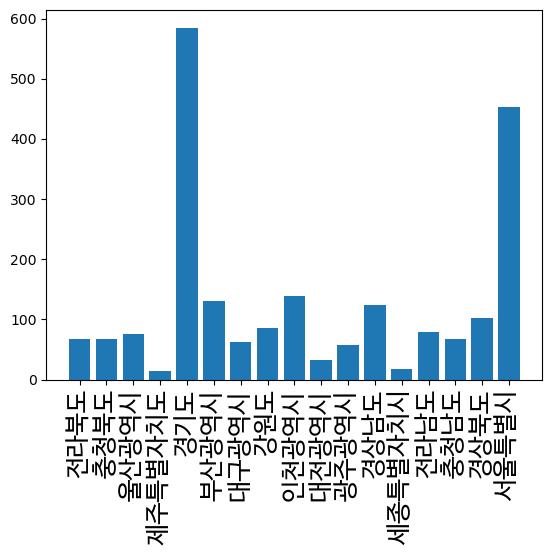

In [ ]:
v3 = [len(df_이디야[df_이디야["시도명"]==a[i]]) for i in range(len(a))]
index = np.arange(len(a))
plt.bar(a, v3)
plt.xticks(index, a, fontsize=13,fontproperties=fontprob, rotation=90)

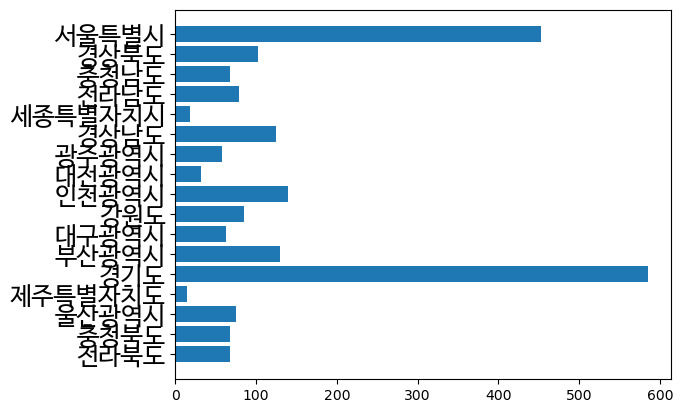

In [ ]:
# 시도별 이디야 분포
plt.barh(index, v3)
plt.yticks(index, a, fontsize=13,fontproperties=fontprob, rotation=0)
plt.show()

In [ ]:
sum_star = sum(v3)
for i in range(len(a)):
    print('이디야의 전국 대비 {}에서의 비율 : {:.3f}%' .format(a[i],v3[i]/sum_star*100))

이디야의 전국 대비 전라북도에서의 비율 : 3.151%
이디야의 전국 대비 충청북도에서의 비율 : 3.105%
이디야의 전국 대비 울산광역시에서의 비율 : 3.475%
이디야의 전국 대비 제주특별자치도에서의 비율 : 0.649%
이디야의 전국 대비 경기도에서의 비율 : 27.108%
이디야의 전국 대비 부산광역시에서의 비율 : 6.024%
이디야의 전국 대비 대구광역시에서의 비율 : 2.873%
이디야의 전국 대비 강원도에서의 비율 : 3.939%
이디야의 전국 대비 인천광역시에서의 비율 : 6.441%
이디야의 전국 대비 대전광역시에서의 비율 : 1.483%
이디야의 전국 대비 광주광역시에서의 비율 : 2.688%
이디야의 전국 대비 경상남도에서의 비율 : 5.746%
이디야의 전국 대비 세종특별자치시에서의 비율 : 0.834%
이디야의 전국 대비 전라남도에서의 비율 : 3.661%
이디야의 전국 대비 충청남도에서의 비율 : 3.105%
이디야의 전국 대비 경상북도에서의 비율 : 4.727%
이디야의 전국 대비 서울특별시에서의 비율 : 20.992%


## 3대 커피브랜드의 점포 수 비교

([<matplotlib.axis.XTick at 0x7fa9f51adbd0>,
 [Text(0, 0, '스타벅스'), Text(1, 0, '투썸'), Text(2, 0, '이디야')])

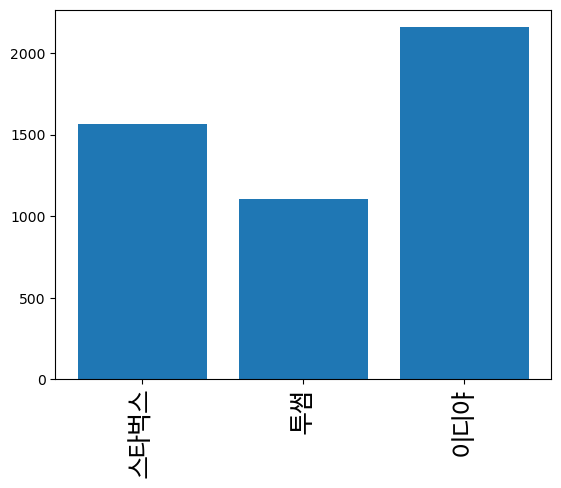

In [ ]:
star = sum(v1)
two = sum(v2)
edia = sum(v3)
X=["스타벅스","투썸","이디야"]
Y=[star, two, edia]
index = [0,1,2]
plt.bar(X, Y)
plt.xticks(index, X, fontsize=13,fontproperties=fontprob, rotation=90)